In [64]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from wettbewerb import load_references, get_3montages, get_6montages
import mne
from scipy import signal as sig
import ruptures as rpt

import pandas as pd

In [2]:
training_folder = "../shared_data/training_mini"

In [3]:
ids, channels, data, sampling_frequencies, reference_systems, eeg_labels = load_references(training_folder) 
# Importiere EKG-Dateien, zugehörige Diagnose, Sampling-Frequenz (Hz) und Name (meist fs=256 Hz)

100	 Dateien wurden geladen.


In [ ]:
# Creatinf dataframe for visualization
df = pd.DataFrame({'ids': ids, 'channels': channels, 'data':data, 'sampling_frequencies': sampling_frequencies, 'reference_systems': reference_systems, 'eeg_labels': eeg_labels})

In [40]:
df

,ids,channels,data,sampling_frequencies,reference_systems,eeg_labels
0,aaaaaaac_s001_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.9907242042298652e-05, -3.479005706961272e...",250,LE,"(1, 36.8868, 237.2101)"
1,aaaaaaac_s001_t001,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[3.9367696157719664e-05, 3.753664052247688e-0...",250,LE,"(1, 12.0764, 200.3233)"
2,aaaaaaac_s002_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[0.00013549811700796534, 0.000128173894466994...",250,LE,"(1, 16.0173, 218.0379)"
3,aaaaaaac_s004_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.2207037568285165e-06, -6.103518784142582e...",250,LE,"(0, 0.0, 0.0)"
4,aaaaaaac_s004_t002,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.800538041322062e-05, -1.770020447401349e-...",250,LE,"(0, 0.0, 0.0)"
...,...,...,...,...,...,...
95,aaaaaasy_s003_t012,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[5.4896614886930954e-05, 5.399683431501409e-0...",400,AR,"(1, 5.285, 26.4575)"
96,aaaaaasy_s003_t013,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.0684953154085916e-05, -1.618605029450158e...",400,AR,"(1, 19.7015, 28.5202)"
97,aaaaaasy_s003_t014,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.528626972258471e-05, -1.528626972258471e-...",400,AR,"(0, 0.0, 0.0)"
98,aaaaaasy_s003_t015,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[1.5306269722588786e-05, 1.5306269722588786e-...",400,AR,"(0, 0.0, 0.0)"


In [41]:
seizure_df = df[df.eeg_labels != (0,0.0,0.0)]
seizure_df.shape

(36, 6)

In [43]:
seizure_df

,ids,channels,data,sampling_frequencies,reference_systems,eeg_labels
0,aaaaaaac_s001_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.9907242042298652e-05, -3.479005706961272e...",250,LE,"(1, 36.8868, 237.2101)"
1,aaaaaaac_s001_t001,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[3.9367696157719664e-05, 3.753664052247688e-0...",250,LE,"(1, 12.0764, 200.3233)"
2,aaaaaaac_s002_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[0.00013549811700796534, 0.000128173894466994...",250,LE,"(1, 16.0173, 218.0379)"
12,aaaaaaag_s005_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[0.0005749697854548803, 0.0006163596917630563...",400,AR,"(1, 57.9625, 72.5225)"
17,aaaaaaav_s001_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[2.4871839045381025e-05, 2.4871839045381025e-...",250,LE,"(1, 1273.452, 1319.1885)"
22,aaaaaacz_s006_t000_1,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[2.4933359294411965e-05, 2.4766048158207856e-...",256,AR,"(1, 86.0306, 109.6364)"
23,aaaaaacz_s006_t000_2,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-3.3062227240831013e-07, -1.5018002258370645...",256,AR,"(1, 515.1996, 560.2324)"
55,aaaaaakv_s001_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.4871839045381025e-05, -2.4871839045381025...",250,LE,"(1, 9.048, 1206.908)"
58,aaaaaalq_s001_t000_1,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.4871839045381025e-05, -2.4871839045381025...",250,LE,"(1, 685.356, 777.276)"
59,aaaaaalq_s001_t000_2,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.800538041322062e-05, -2.3803723258156076e...",250,LE,"(1, 93.976, 266.676)"


In [76]:
idx_record = 12

new_montage, new_data, is_missing = get_3montages(channels[idx_record], data[idx_record])
print("Alle Montagen wurden berechnet: ", not is_missing)
print("Montagen: ",new_montage)
print("Signal Dimension: ", new_data.shape)

Alle Montagen wurden berechnet:  True
Montagen:  ['Fp1-F3', 'Fp2-F4', 'C3-P3']
Signal Dimension:  (3, 301200)


In [68]:
_off_sets

[0.004863014064353363, 0, -0.004863014064353363]

In [71]:
new_data[2,:]

array([2.06949532e-05, 3.32918812e-05, 3.41916617e-05, ...,
       9.89758629e-06, 1.34967086e-05, 1.16971474e-05])

In [72]:
_montage

'F3-C3'

In [69]:
new_montage

['Fp1-F3', 'Fp2-F4', 'C3-P3', 'F3-C3', 'F4-C4', 'C4-P4']

0 Fp1-F3
0.004863014064353363
1 Fp2-F4
0
2 C3-P3
-0.004863014064353363


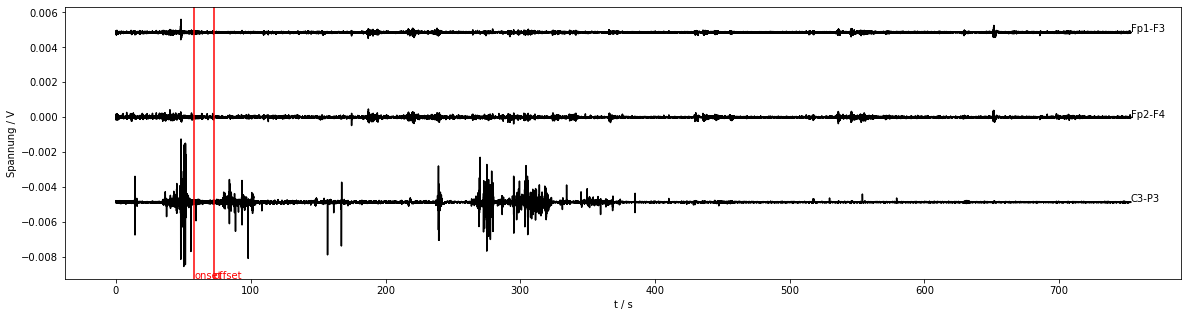

In [77]:
fig, axs = plt.subplots(figsize=[20,5])
max_diff=new_data.max()-new_data.min()
time_ax = np.arange(new_data.shape[1])/sampling_frequencies[idx_record]
_off_sets = [max_diff/1.5,0,-max_diff/1.5]
_labels = eeg_labels[idx_record]

for i, _montage in enumerate(new_montage):
    print(i, _montage)
    print(_off_sets[i])
    plt.plot(time_ax,new_data[i,:]+_off_sets[i],'k')
    plt.text(time_ax[-1], new_data[i,-1]+_off_sets[i], _montage)
if _labels[0]:
    plt.axvline(x = _labels[1], color = 'r', label = 'onset')
    plt.text(_labels[1], axs.get_ylim()[0], 'onset',color='r')  
    plt.axvline(x = _labels[2], color = 'r', label = 'offset')
    plt.text(_labels[2], axs.get_ylim()[0], 'offset',color='r')   
plt.xlabel("t / s")
plt.ylabel("Spannung / V")
plt.show()

In [60]:
new_data.max()

0.00012686906064027833

In [78]:
df

,ids,channels,data,sampling_frequencies,reference_systems,eeg_labels
0,aaaaaaac_s001_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.9907242042298652e-05, -3.479005706961272e...",250,LE,"(1, 36.8868, 237.2101)"
1,aaaaaaac_s001_t001,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[3.9367696157719664e-05, 3.753664052247688e-0...",250,LE,"(1, 12.0764, 200.3233)"
2,aaaaaaac_s002_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[0.00013549811700796534, 0.000128173894466994...",250,LE,"(1, 16.0173, 218.0379)"
3,aaaaaaac_s004_t000,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.2207037568285165e-06, -6.103518784142582e...",250,LE,"(0, 0.0, 0.0)"
4,aaaaaaac_s004_t002,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.800538041322062e-05, -1.770020447401349e-...",250,LE,"(0, 0.0, 0.0)"
...,...,...,...,...,...,...
95,aaaaaasy_s003_t012,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[5.4896614886930954e-05, 5.399683431501409e-0...",400,AR,"(1, 5.285, 26.4575)"
96,aaaaaasy_s003_t013,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-2.0684953154085916e-05, -1.618605029450158e...",400,AR,"(1, 19.7015, 28.5202)"
97,aaaaaasy_s003_t014,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[-1.528626972258471e-05, -1.528626972258471e-...",400,AR,"(0, 0.0, 0.0)"
98,aaaaaasy_s003_t015,"[Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7,...","[[1.5306269722588786e-05, 1.5306269722588786e-...",400,AR,"(0, 0.0, 0.0)"


In [92]:
import mne
from mne.io import RawArray
from mne.time_frequency import psd_array_multitaper
from mne.features import mean_absolute_deviation, hjorth_parameters
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

ModuleNotFoundError: No module named 'mne.features'

In [85]:
data.a

AttributeError: 'list' object has no attribute 'a'